## Loan Prediction

### Steps to solve machine learning projects
1. start
2. data selection
3. data description : A story of data is all abot and the features present in the data
4. performing both statistical and graphical data analysis
5. data tranformation and derivation of new attributes , if necessary
6. selection of machine learning algorithms based on the patterns observed in EDA
7. data standardization and normalization
8. creation of train and test data sets
9. model training using machine learning algorithms
10. calculation of model accuracy : both training and testing accuracy
11. hyper parameter tuning to achieve a better accuracy 
12. saving the created model file 
13. Deployement strategies for model
14. production deployment and testing


In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1.0,Urban,Y
1,LP001002,Male,No,0,Graduate,No,5849,0.0,141,360,1.0,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N
3,LP001004,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y
4,LP001005,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y


In [3]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
4973,LP005974,Male,Yes,0,Graduate,No,2500,3796.0,120,360,1.0,Urban,Y
4974,LP005975,Male,Yes,3+,Graduate,No,3029,0.0,99,360,1.0,Urban,Y
4975,LP005976,Male,Yes,0,Not Graduate,Yes,2609,3449.0,165,180,0.0,Rural,N
4976,LP005977,Male,Yes,1,Graduate,No,4945,0.0,141,360,0.0,Rural,N
4977,LP005978,Female,No,0,Graduate,No,4166,0.0,116,360,0.0,Semiurban,N


In [4]:
df.shape

(4978, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            4978 non-null   object 
 1   Gender             4978 non-null   object 
 2   Married            4978 non-null   object 
 3   Dependents         4978 non-null   object 
 4   Education          4978 non-null   object 
 5   Self_Employed      4978 non-null   object 
 6   ApplicantIncome    4978 non-null   int64  
 7   CoapplicantIncome  4978 non-null   float64
 8   LoanAmount         4978 non-null   int64  
 9   Loan_Amount_Term   4978 non-null   int64  
 10  Credit_History     4978 non-null   float64
 11  Property_Area      4978 non-null   object 
 12  Loan_Status        4978 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 505.7+ KB


In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df.describe()   #bydefault interger column

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000
mean,5386.340498,1622.144910,146.006428,341.881077,0.841501
std,6071.961401,2914.373234,83.767788,64.151847,0.349726
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,129.000000,360.000000,1.000000
75%,5780.000000,2302.000000,164.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [8]:
df['ApplicantIncome']

0       1299
1       5849
2       4583
3       3000
4       2583
        ... 
4973    2500
4974    3029
4975    2609
4976    4945
4977    4166
Name: ApplicantIncome, Length: 4978, dtype: int64

In [9]:
df[['ApplicantIncome', 'LoanAmount']]

,ApplicantIncome,LoanAmount
0,1299,17
1,5849,141
2,4583,128
3,3000,66
4,2583,120
...,...,...
4973,2500,120
4974,3029,99
4975,2609,165
4976,4945,141


In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## data preprocessing

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            4978 non-null   object 
 1   Gender             4978 non-null   object 
 2   Married            4978 non-null   object 
 3   Dependents         4978 non-null   object 
 4   Education          4978 non-null   object 
 5   Self_Employed      4978 non-null   object 
 6   ApplicantIncome    4978 non-null   int64  
 7   CoapplicantIncome  4978 non-null   float64
 8   LoanAmount         4978 non-null   int64  
 9   Loan_Amount_Term   4978 non-null   int64  
 10  Credit_History     4978 non-null   float64
 11  Property_Area      4978 non-null   object 
 12  Loan_Status        4978 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 505.7+ KB


In [13]:
# handle numerical missing data
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# handle categorical missing data
df['Gender'].mode()[0]

'Male'

In [16]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exloratory data anlysis

In [18]:
# !pip install seaborn

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

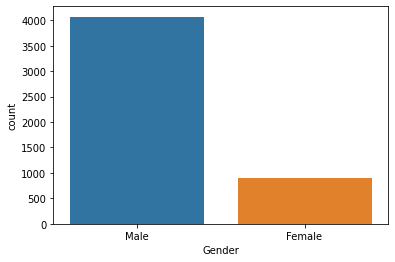

In [19]:
# categorical data
import seaborn as sns
sns.countplot(df['Gender'])

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

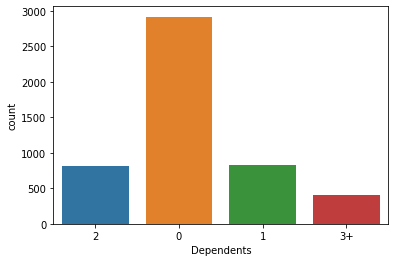

In [20]:
sns.countplot(df.Dependents)

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

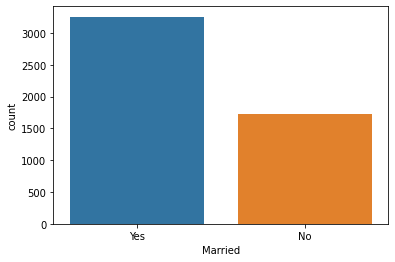

In [21]:
sns.countplot(df.Married)

In [22]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

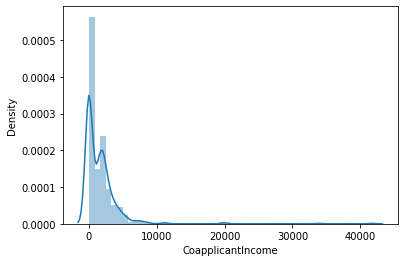

In [23]:
# numerical data
sns.distplot(df.CoapplicantIncome)

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

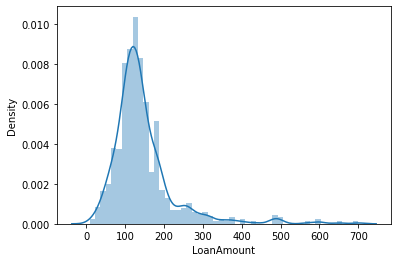

In [24]:
sns.distplot(df.LoanAmount)

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

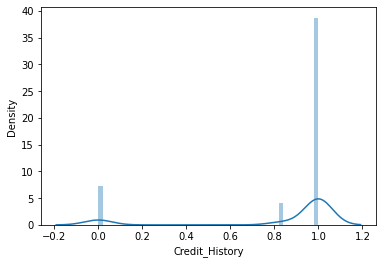

In [25]:
sns.distplot(df.Credit_History)

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001001,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1.0,Urban,Y
1,LP001002,Male,No,0,Graduate,No,5849,0.0,141,360,1.0,Urban,Y
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N
3,LP001004,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y
4,LP001005,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y


In [27]:
# created new column

In [28]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,LP001001,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1.0,Urban,Y,2385.0
1,LP001002,Male,No,0,Graduate,No,5849,0.0,141,360,1.0,Urban,Y,5849.0
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,6091.0
3,LP001004,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,3000.0
4,LP001005,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,4941.0


In [30]:
# data transformation

In [31]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

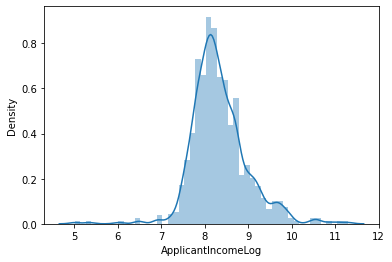

In [32]:
sns.distplot(df.ApplicantIncomeLog)

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncomeLog', ylabel='Density'>

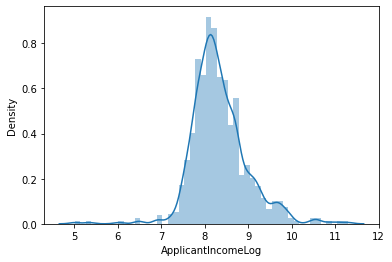

In [33]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmountLog', ylabel='Density'>

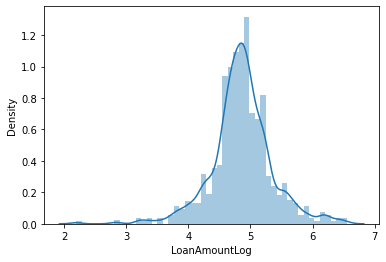

In [34]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term_Log', ylabel='Density'>

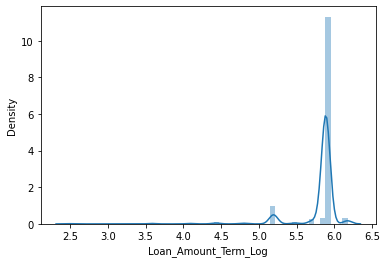

In [35]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_Log', ylabel='Density'>

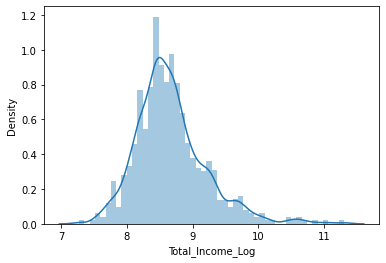

In [36]:
df['Total_Income_Log'] = np.log(df['Total_income'])
sns.distplot(df["Total_Income_Log"])

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001001,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1.0,Urban,Y,2385.0,7.169350,6.990257,2.833213,4.787492,7.776954
1,LP001002,Male,No,0,Graduate,No,5849,0.0,141,360,1.0,Urban,Y,5849.0,8.674026,-inf,4.948760,5.886104,8.674026
2,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
3,LP001004,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
4,LP001005,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323


In [38]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [39]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,2,Graduate,No,1.0,Urban,Y,7.169350,2.833213,4.787492,7.776954
1,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.948760,5.886104,8.674026
2,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
3,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
4,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323


In [40]:
df.Loan_Status.value_counts()

Y    3417
N    1561
Name: Loan_Status, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                4978 non-null   object 
 1   Married               4978 non-null   object 
 2   Dependents            4978 non-null   object 
 3   Education             4978 non-null   object 
 4   Self_Employed         4978 non-null   object 
 5   Credit_History        4978 non-null   float64
 6   Property_Area         4978 non-null   object 
 7   Loan_Status           4978 non-null   object 
 8   ApplicantIncomeLog    4978 non-null   float64
 9   LoanAmountLog         4978 non-null   float64
 10  Loan_Amount_Term_Log  4978 non-null   float64
 11  Total_Income_Log      4978 non-null   float64
dtypes: float64(5), object(7)
memory usage: 466.8+ KB


In [42]:
df.Education.value_counts()

Graduate        3892
Not Graduate    1086
Name: Education, dtype: int64

### handling categorical data

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                4978 non-null   object 
 1   Married               4978 non-null   object 
 2   Dependents            4978 non-null   object 
 3   Education             4978 non-null   object 
 4   Self_Employed         4978 non-null   object 
 5   Credit_History        4978 non-null   float64
 6   Property_Area         4978 non-null   object 
 7   Loan_Status           4978 non-null   object 
 8   ApplicantIncomeLog    4978 non-null   float64
 9   LoanAmountLog         4978 non-null   float64
 10  Loan_Amount_Term_Log  4978 non-null   float64
 11  Total_Income_Log      4978 non-null   float64
dtypes: float64(5), object(7)
memory usage: 466.8+ KB


In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,2,Graduate,No,1.0,Urban,Y,7.169350,2.833213,4.787492,7.776954
1,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.948760,5.886104,8.674026
2,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
3,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
4,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323


In [45]:
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)



df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)

In [46]:
# cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
# for col in cols:
#     df[col] = pd.get_dummies(df[col], drop_first= True)

In [47]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,7.169350,2.833213,4.787492,7.776954,1,1,0,1,0,0,0,0,1
1,1.0,Y,8.674026,4.948760,5.886104,8.674026,1,0,0,0,0,0,0,0,1
2,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
3,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
4,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Credit_History        4978 non-null   float64
 1   Loan_Status           4978 non-null   object 
 2   ApplicantIncomeLog    4978 non-null   float64
 3   LoanAmountLog         4978 non-null   float64
 4   Loan_Amount_Term_Log  4978 non-null   float64
 5   Total_Income_Log      4978 non-null   float64
 6   Male                  4978 non-null   uint8  
 7   Yes                   4978 non-null   uint8  
 8   1                     4978 non-null   uint8  
 9   2                     4978 non-null   uint8  
 10  3+                    4978 non-null   uint8  
 11  Not Graduate          4978 non-null   uint8  
 12  Yes                   4978 non-null   uint8  
 13  Semiurban             4978 non-null   uint8  
 14  Urban                 4978 non-null   uint8  
dtypes: float64(5), object

In [49]:
df.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000,4978.000000
mean,0.841501,8.339292,4.859191,5.801924,8.667784,0.817798,0.653676,0.166131,0.164926,0.082563,0.218160,0.185617,0.378063,0.332463
std,0.349726,0.643137,0.496680,0.311098,0.543924,0.386049,0.475846,0.372236,0.371151,0.275249,0.413038,0.388836,0.484952,0.471143
min,0.000000,5.010635,2.197225,2.484907,7.273786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.964156,4.605170,5.886104,8.334712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.245909,4.859812,5.886104,8.597113,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.662159,5.099866,5.886104,8.920255,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302204,6.551080,6.173786,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
# test datasets

In [51]:
test = pd.read_csv("test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

test['CoapplicantIncomeLog'] = np.log(test['CoapplicantIncome'])

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

test['Total_Income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID', 'CoapplicantIncomeLog']
test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)



df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)


C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [52]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


### split datasets

In [53]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,7.169350,2.833213,4.787492,7.776954,1,1,0,1,0,0,0,0,1
1,1.0,Y,8.674026,4.948760,5.886104,8.674026,1,0,0,0,0,0,0,0,1
2,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
3,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
4,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1


In [54]:
# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [55]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,7.169350,2.833213,4.787492,7.776954,1,1,0,1,0,0,0,0,1
1,1.0,8.674026,4.948760,5.886104,8.674026,1,0,0,0,0,0,0,0,1
2,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
3,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
4,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,1.0,7.824046,4.787492,5.886104,8.747670,1,1,0,0,0,0,0,0,1
4974,1.0,8.015988,4.595120,5.886104,8.015988,1,1,0,0,1,0,0,0,1
4975,0.0,7.866722,5.105945,5.192957,8.709135,1,1,0,0,0,1,1,0,0
4976,0.0,8.506132,4.948760,5.886104,8.506132,1,1,1,0,0,0,0,0,0


In [56]:
y

0       Y
1       Y
2       N
3       Y
4       Y
       ..
4973    Y
4974    Y
4975    N
4976    N
4977    N
Name: Loan_Status, Length: 4978, dtype: object

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [58]:
x_train.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
2073,1.0,7.820440,4.644391,5.886104,8.421783,1,1,1,0,0,0,0,1,0
1487,1.0,9.594446,5.717028,5.886104,9.728122,1,1,0,0,0,0,0,0,0
3137,0.0,8.070906,4.836282,5.192957,8.604105,1,0,0,0,0,1,0,0,1
3409,0.0,7.512071,4.948760,5.886104,7.512071,0,0,0,0,1,1,0,0,1
3828,1.0,7.900266,4.804021,5.886104,8.462103,1,1,0,0,0,0,0,1,0


In [59]:
y_test.head()

3992    N
144     Y
3062    N
4824    Y
2574    Y
Name: Loan_Status, dtype: object

In [60]:
# model training

In [61]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 100.0


In [63]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 100.0


In [64]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 80.16064257028113


C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [65]:
# confusion matrics

In [66]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm


array([[424,   0],
       [  0, 821]], dtype=int64)

In [67]:
# GradientBoostingClassifier

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

model4 = GradientBoostingClassifier()

model4.fit(x_train, y_train)

print("Accuracy is", model4.score(x_test, y_test)*100)

Accuracy is 87.63052208835342


In [69]:
#LogisticRegression

In [72]:
from sklearn.linear_model import LogisticRegression

model5 = LogisticRegression()

model5.fit(x_train, y_train)

print("Accuracy is", model5.score(x_test, y_test)*100)

Accuracy is 80.16064257028113


C:\Users\sivak\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
# model save

In [76]:
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)